<center><h1><b>BANK ANALYSIS</b></h1></center>

# Data Cleaning

Імпортуємо необхідні бібліотеки.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Джерело даних - агреговані баланси банків:
https://bank.gov.ua/ua/statistic/supervision-statist ("Згруповані балансові залишки (у розрізі банків)")


**Завдання 1 (базова статистика):**

1) Завантажити дані за 2021, 2022, 2023 роки.
2) В основі аналізу буде показник "Кредити та заборгованість клієнтів" (аркуш "Активи", колонка 13).
3) Необхідно підготувати масив даних за 2021-2023 рр. у такому вигляді:
    - дата;
    - група банку (Банки з державною часткою, з приватним капіталом тощо);
    - NKB (номер банку);
    - назва банку;
    - сума, тис. грн. (Кредити та заборгованість клієнтів);
    - Загальні активи, усього.
4) Розрахувати на 01.08.2023 середнє і медіану за кожною з представлених груп банків у вигляді таблиці.<br>
   Далі побудувати діаграму розсіювання ($scatter plot$) окремо для кожної групи банків.<br>
   Вісь $X$ = Загальні активи, $Y$ = Кредитний портфель.<br> 
   Розмір точок регулюється через показник "Кредитний портфель". Дата зрізу = 01.08.2023.


**Завдання 2 (лінійна модель):**

На основі підготовленого масиву даних, тобто динаміки Кредитного портфеля за 2021-2023 рр., побудувати лінійну модель по кожному банку.<br>
Оцінити коректність моделі ($adj.r.squared$), тобто наскільки точно модель описує дані.<br>
Побудувати лінійні графіки кредитного портфеля + відобразити саму лінійну модель.<br>
Графіки будуємо за ТОП 20 банками з найбільшим кредитним портфелем станом на 01.08.2023.

Дано 31 файл $Excel$, в яких розміщені дані про банки за 2021-2023 роки і які потрібно прочитати та об'єднати в один датафрейм.

Для цього будемо проходити циклом по кожному файлу. 

Спочатку створимо список з назвами файлів.

In [3]:
files = ['aggregation_2021-02-01.xlsx',
         'aggregation_2021-03-01.xlsx',
         'aggregation_2021-04-01.xlsx',
         'aggregation_2021-05-01.xlsx',
         'aggregation_2021-06-01.xlsx',
         'aggregation_2021-07-01.xlsx',
         'aggregation_2021-08-01.xlsx',
         'aggregation_2021-09-01.xlsx',
         'aggregation_2021-10-01.xlsx',
         'aggregation_2021-11-01.xlsx',
         'aggregation_2021-12-01.xlsx',
         'aggregation_2022-01-01.xlsx',
         'aggregation_2022-02-01.xlsx',
         'aggregation_2022-03-01.xlsx',
         'aggregation_2022-04-01.xlsx',
         'aggregation_2022-05-01.xlsx',
         'aggregation_2022-06-01.xlsx',
         'aggregation_2022-07-01.xlsx',
         'aggregation_2022-08-01.xlsx',
         'aggregation_2022-09-01.xlsx',
         'aggregation_2022-10-01.xlsx',
         'aggregation_2022-11-01.xlsx',
         'aggregation_2022-12-01.xlsx',
         'aggregation_2023-01-01.xlsx',
         'aggregation_2023-02-01.xlsx',
         'aggregation_2023-03-01.xlsx',
         'aggregation_2023-04-01.xlsx',
         'aggregation_2023-05-01.xlsx',
         'aggregation_2023-06-01.xlsx',
         'aggregation_2023-07-01.xlsx',
         'aggregation_2023-08-01.xlsx']

Створимо список потрібних дат для нової колонки 'Дати'.

In [4]:
dates = pd.date_range(start='2021-02-01', end='2023-08-01', freq='MS')
dates

DatetimeIndex(['2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01',
               '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01',
               '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01',
               '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01',
               '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01',
               '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01',
               '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01',
               '2023-06-01', '2023-07-01', '2023-08-01'],
              dtype='datetime64[ns]', freq='MS')

In [5]:
#будуємо потрібний датафрейм
df = []
for i, file in enumerate(files):
    f = pd.read_excel(file,
                   sheet_name='Активи',
                   skiprows = 5,
                   header = None,
                   usecols = [1, 2, 12, 34],
                     )
    #створюємо стовпчик з датами
    f.insert(0, 'Дата', dates[i])
    #перейменування стовпців
    f = f.rename({ 1: 'NKB', 2: 'Банк', 12: 'Кредитний портфель', 34: 'Загальні активи'}, axis = 1)
    #видалення зайвих рядків
    f = f[(f['NKB'] != 2) & (f['Банк'] != 3)]
    #створення стовпця з групами банків
    group = None
    for index, row in f.iterrows():
        if not pd.notna(row[4]):
            group = row[2]
        else:
            f.at[index, 'Група банку'] = group            
    #видалення зайвих рядків
    f = f[pd.notna(f['NKB'])]
    df.append(f)
#об'єднуємо в датафрейм    
df = pd.concat(df, ignore_index=True)

Отримали такий результат:

In [6]:
df.head(20)

,Дата,NKB,Банк,Кредитний портфель,Загальні активи,Група банку
0,2021-02-01,46,"АТ КБ ""ПриватБанк""",57195899.10698,560261598.85777,Банки з державною часткою
1,2021-02-01,6,"АТ ""Ощадбанк""",69417687.17241,278543325.81922,Банки з державною часткою
2,2021-02-01,2,"АТ ""Укрексімбанк""",47482713.7952,236828268.27005,Банки з державною часткою
3,2021-02-01,274,"АБ ""УКРГАЗБАНК""",47057767.21835,150670459.04825,Банки з державною часткою
4,2021-02-01,593,"ПАТ ""РОЗРАХУНКОВИЙ ЦЕНТР""",0.0,332172.65899,Банки з державною часткою
5,2021-02-01,36,"АТ ""Райффайзен Банк Аваль""",45001854.31829,117493463.52263,Банки іноземних банківських груп
6,2021-02-01,272,"АТ ""АЛЬФА-БАНК""",47609066.69996,111511057.32084,Банки іноземних банківських груп
7,2021-02-01,136,"АТ ""УКРСИББАНК""",21442101.47015,72449199.56217,Банки іноземних банківських груп
8,2021-02-01,299,"АТ ""СБЕРБАНК""",9530679.17788,64426033.8339,Банки іноземних банківських груп
9,2021-02-01,296,"АТ ""ОТП БАНК""",27362288.01737,62464891.81391,Банки іноземних банківських груп


In [7]:
#округлення чисел
pd.options.display.float_format = '{:.0f}'.format
df.head()

,Дата,NKB,Банк,Кредитний портфель,Загальні активи,Група банку
0,2021-02-01,46,"АТ КБ ""ПриватБанк""",57195899,560261599,Банки з державною часткою
1,2021-02-01,6,"АТ ""Ощадбанк""",69417687,278543326,Банки з державною часткою
2,2021-02-01,2,"АТ ""Укрексімбанк""",47482714,236828268,Банки з державною часткою
3,2021-02-01,274,"АБ ""УКРГАЗБАНК""",47057767,150670459,Банки з державною часткою
4,2021-02-01,593,"ПАТ ""РОЗРАХУНКОВИЙ ЦЕНТР""",0,332173,Банки з державною часткою


Щоб "почистити" дані, треба прибрати якомога більше пропусків та виправити (за потреби) некоректні дані.

Дізнаємося скільки пропущених значень в кожному стовпчику.

In [8]:
df.isna().sum()

Дата                   0
NKB                    0
Банк                  30
Кредитний портфель     0
Загальні активи        0
Група банку            0
dtype: int64

Бачимо, що стовпчик 'Банк' містить 30 пропусків.

In [9]:
df[pd.isna(df['Банк'])]

,Дата,NKB,Банк,Кредитний портфель,Загальні активи,Група банку
73,2021-02-01,УСЬОГО,NaN,598320257,2206650191,Банки з приватним капіталом
147,2021-03-01,УСЬОГО,NaN,602296517,2210171543,Банки з приватним капіталом
293,2021-05-01,УСЬОГО,NaN,624555720,2242972354,Банки з приватним капіталом
367,2021-06-01,УСЬОГО,NaN,640074086,2248650706,Банки з приватним капіталом
441,2021-07-01,УСЬОГО,NaN,653354805,2249300922,Банки з приватним капіталом
514,2021-08-01,УСЬОГО,NaN,660714679,2259391866,Банки з приватним капіталом
587,2021-09-01,УСЬОГО,NaN,695307301,2247805949,Неплатоспроможні банки
659,2021-10-01,УСЬОГО,NaN,717867901,2261692010,Банки з приватним капіталом
731,2021-11-01,УСЬОГО,NaN,735681994,2275586721,Банки з приватним капіталом
803,2021-12-01,УСЬОГО,NaN,765286675,2290306889,Банки з приватним капіталом


Це рядки зі сумарними значеннями, які нам не потрібні, тому можемо їх видалити.

In [10]:
df = df[pd.notna(df['Банк'])]

In [11]:
df.isna().sum()

Дата                  0
NKB                   0
Банк                  0
Кредитний портфель    0
Загальні активи       0
Група банку           0
dtype: int64

Тепер пропусків немає. Розглянемо типи даних:

In [12]:
df.dtypes

Дата                  datetime64[ns]
NKB                           object
Банк                          object
Кредитний портфель            object
Загальні активи               object
Група банку                   object
dtype: object

NKB мають бути цілими числами та мати формат $int$, а кредитний портфель та загальні активи --- $float$, але вони мають тип $object$. 

Це треба виправити.

In [13]:
df['NKB'].astype('int')

0        46
1         6
2         2
3       274
4       593
       ... 
2166    311
2167    634
2168    313
2169    129
2170    512
Name: NKB, Length: 2142, dtype: int32

In [14]:
df['NKB'] = df['NKB'].astype('int')
df.dtypes

Дата                  datetime64[ns]
NKB                            int32
Банк                          object
Кредитний портфель            object
Загальні активи               object
Група банку                   object
dtype: object

In [15]:
#перевіряємо некоректні данні в Кредитах
invalid_c = df[pd.to_numeric(df['Кредитний портфель'], errors='coerce').isna()]
invalid_c

,Дата,NKB,Банк,Кредитний портфель,Загальні активи,Група банку
1016,2022-03-01,49,Полікомбанк,…,…,Банки з приватним капіталом


In [16]:
#перевіряємо некоректні данні в Загальних активах
invalid_a = df[pd.to_numeric(df['Загальні активи'], errors='coerce').isna()]
invalid_a

,Дата,NKB,Банк,Кредитний портфель,Загальні активи,Група банку
1016,2022-03-01,49,Полікомбанк,…,…,Банки з приватним капіталом


In [17]:
df = df.drop(1016)

Як бачимо, проблема була саме в цьому рядку. Тепер можемо його видалити.

In [18]:
df['Кредитний портфель'] = df['Кредитний портфель'].astype('float')

In [19]:
df['Загальні активи'] = df['Загальні активи'].replace(',', '.').astype('float')

In [20]:
df.dtypes

Дата                  datetime64[ns]
NKB                            int32
Банк                          object
Кредитний портфель           float64
Загальні активи              float64
Група банку                   object
dtype: object

Тепер всі дані очищені та готові до подальшого аналізу.

# Exploratory Data Analysis

Зробимо простий розвідувальний аналіз — це проста статистика, зведені таблиці, візуалізація. Це дасть нам змогу краще зрозуміти дані та виявити між ними якісь закономірності.

In [21]:
df['Загальні активи'].describe()

count        2141
mean     35537859
std      90702749
min         10257
25%       1728854
50%       4755700
75%      23632395
max     777563028
Name: Загальні активи, dtype: float64

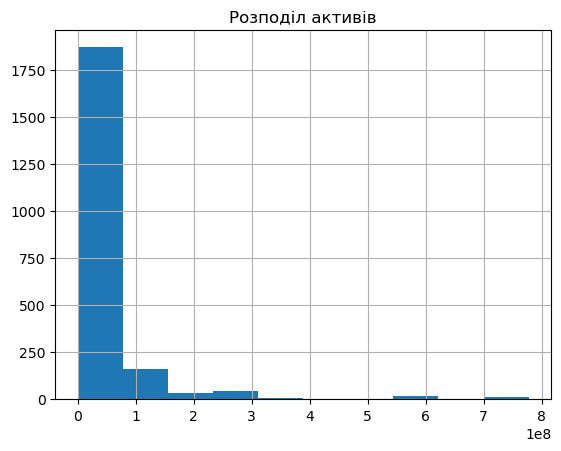

In [22]:
df['Загальні активи'].hist()
plt.title('Розподіл активів')
plt.show()

In [23]:
df['Кредитний портфель'].describe()

count       2141
mean    10145774
std     19268208
min            0
25%       381285
50%      1272611
75%      7423246
max     89433898
Name: Кредитний портфель, dtype: float64

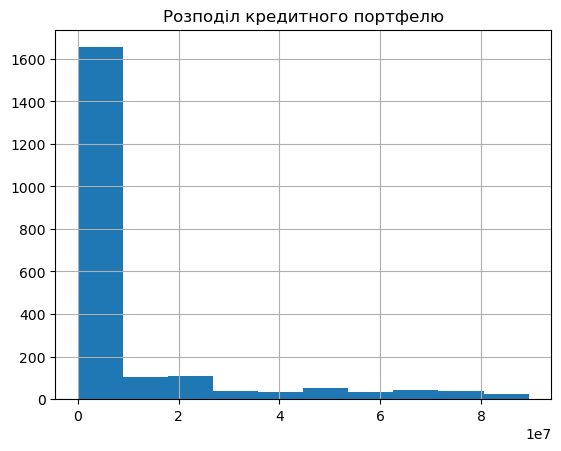

In [24]:
df['Кредитний портфель'].hist()
plt.title('Розподіл кредитного портфелю')
plt.show()

In [25]:
df['NKB'].value_counts()

46     31
240    31
553    31
123    31
290    31
       ..
126    18
3      13
299    13
243     8
593     6
Name: NKB, Length: 73, dtype: int64

In [26]:
df[df['NKB'] == 593]

,Дата,NKB,Банк,Кредитний портфель,Загальні активи,Група банку
4,2021-02-01,593,"ПАТ ""РОЗРАХУНКОВИЙ ЦЕНТР""",0,332173,Банки з державною часткою
78,2021-03-01,593,"ПАТ ""РОЗРАХУНКОВИЙ ЦЕНТР""",0,556079,Банки з державною часткою
151,2021-04-01,593,"ПАТ ""РОЗРАХУНКОВИЙ ЦЕНТР""",0,390725,Банки з державною часткою
224,2021-05-01,593,"ПАТ ""РОЗРАХУНКОВИЙ ЦЕНТР""",0,329245,Банки з державною часткою
298,2021-06-01,593,"ПАТ ""РОЗРАХУНКОВИЙ ЦЕНТР""",0,358298,Банки з державною часткою
372,2021-07-01,593,"ПАТ ""РОЗРАХУНКОВИЙ ЦЕНТР""",0,343114,Банки з державною часткою


In [27]:
#видаояємо рядки з нульовим кредитним портфелем
df = df[df['NKB']!= 593]

In [28]:
df[df['NKB'] == 243]

,Дата,NKB,Банк,Кредитний портфель,Загальні активи,Група банку
63,2021-02-01,243,"АТ ""КБ ""ЗЕМЕЛЬНИЙ КАПІТАЛ""",490712,944492,Банки з приватним капіталом
137,2021-03-01,243,"АТ ""КБ ""ЗЕМЕЛЬНИЙ КАПІТАЛ""",496940,955355,Банки з приватним капіталом
209,2021-04-01,243,"АТ ""КБ ""ЗЕМЕЛЬНИЙ КАПІТАЛ""",476473,936844,Банки з приватним капіталом
283,2021-05-01,243,"АТ ""КБ ""ЗЕМЕЛЬНИЙ КАПІТАЛ""",476849,908523,Банки з приватним капіталом
358,2021-06-01,243,"АТ ""КБ ""ЗЕМЕЛЬНИЙ КАПІТАЛ""",442611,909983,Банки з приватним капіталом
432,2021-07-01,243,"АТ ""КБ ""ЗЕМЕЛЬНИЙ КАПІТАЛ""",439727,873990,Банки з приватним капіталом
507,2021-08-01,243,"АТ ""КБ ""ЗЕМЕЛЬНИЙ КАПІТАЛ""",395596,854133,Банки з приватним капіталом
586,2021-09-01,243,"АТ ""КБ ""ЗЕМЕЛЬНИЙ КАПІТАЛ""",312297,843951,Неплатоспроможні банки


Однакові банки мають єдинний NKB. 

В подальшому при побудові моделі ми можемо не переводити назви у числа, а просто скористатися їх NKB.

In [29]:
df['Група банку'].value_counts()

Банки з приватним капіталом         1466
Банки іноземних банківських груп     541
Банки з державною часткою            124
Неплатоспроможні банки                 4
Name: Група банку, dtype: int64

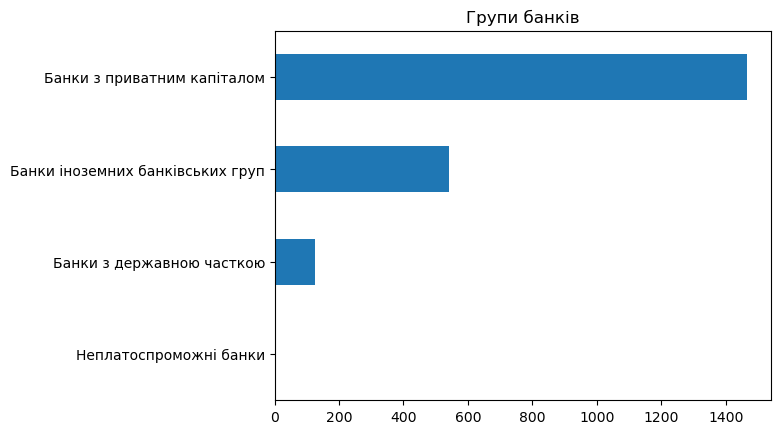

In [30]:
df['Група банку'].value_counts().sort_values().plot(kind='barh')
plt.title('Групи банків')
plt.show()

Бачимо, що найбільша кількість банків з приватним капіталом і є 4 неплатоспроможні банки:

In [31]:
df[df['Група банку'] == 'Неплатоспроможні банки']

,Дата,NKB,Банк,Кредитний портфель,Загальні активи,Група банку
586,2021-09-01,243,"АТ ""КБ ""ЗЕМЕЛЬНИЙ КАПІТАЛ""",312297,843951,Неплатоспроможні банки
1296,2022-07-01,126,"АТ ""МЕГА БАНК""*",7214,10257,Неплатоспроможні банки
1434,2022-09-01,460,"АТ ""БАНК СІЧ""",1125019,2522167,Неплатоспроможні банки
1503,2022-10-01,460,"АТ ""БАНК СІЧ""",1069309,2527330,Неплатоспроможні банки


Розрахуємо на 01.08.2023 середнє і медіану кредитного портфелю та загальних активів за кожною з представлених груп банків

In [32]:
dff = df[df['Дата'] == '2023-08-01']
table = pd.pivot_table(dff, 
                       values = ['Кредитний портфель', 'Загальні активи'], 
                       index = 'Група банку',
                       aggfunc = {'Кредитний портфель': ['mean', 'median'], 'Загальні активи': ['mean', 'median']})

In [33]:
table.T

Група банку                Банки з державною часткою  \
Загальні активи    mean                    332567282   
                   median                  281057575   
Кредитний портфель mean                     67231529   
                   median                   74538393   

Група банку                Банки з приватним капіталом  \
Загальні активи    mean                       12611774   
                   median                      3071188   
Кредитний портфель mean                        3507857   
                   median                       576333   

Група банку                Банки іноземних банківських груп  
Загальні активи    mean                            53704052  
                   median                          31961864  
Кредитний портфель mean                            10820333  
                   median                           5139202

Вже за цією таблицею, можна зробити висновок, що середні значення і медіани загальних активів загалом більші кредитних портфелей, незалежно від групи банка.

Візуалізуємо сппіввідношення кредитного портфелю та активів банків на 2023-08-01 за допомогою діаграми розсіювання.

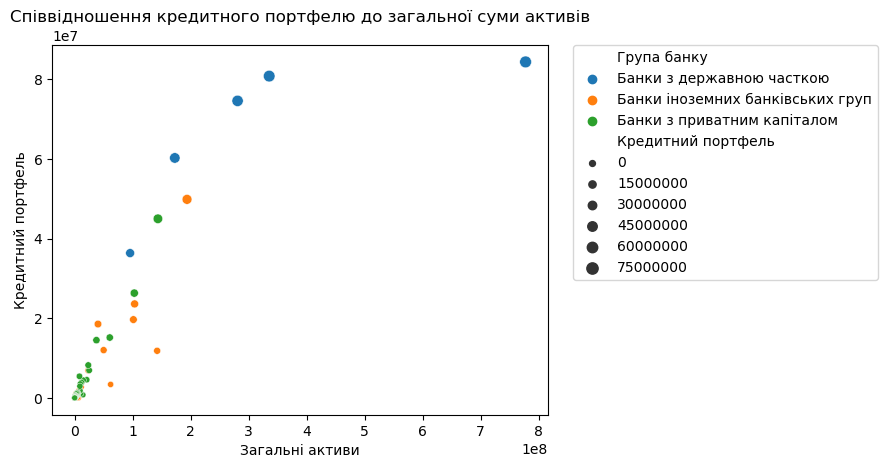

In [34]:
sns.scatterplot(data = dff, 
                x ='Загальні активи', 
                y ='Кредитний портфель', 
                hue = 'Група банку', 
                size = 'Кредитний портфель')
plt.title('Співвідношення кредитного портфелю до загальної суми активів')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

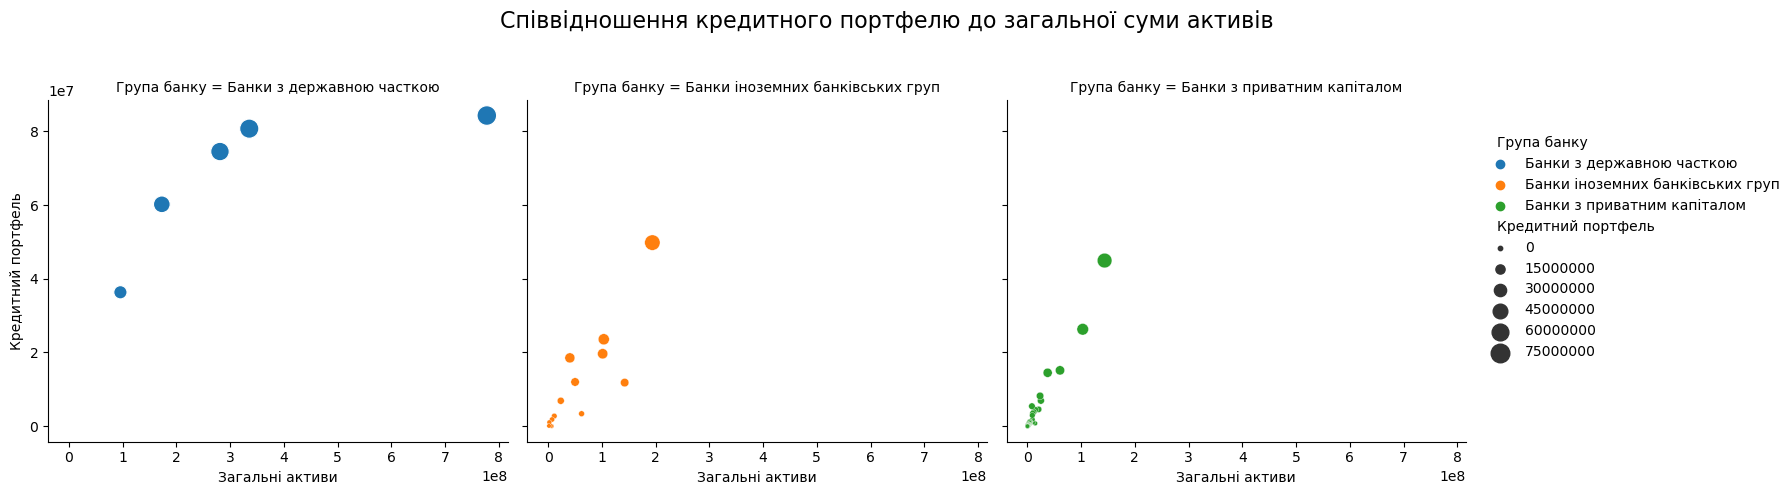

In [35]:
#sns.set(style = "whitegrid")
s = sns.relplot(data = dff, 
            x ='Загальні активи', 
            y ='Кредитний портфель', 
            col ='Група банку', 
            hue ='Група банку',
            size = 'Кредитний портфель',
            sizes = (10, 200))
plt.subplots_adjust(top = 0.8)
s.fig.suptitle('Співвідношення кредитного портфелю до загальної суми активів', fontsize=16)
plt.show()

Тепер зробимо це за допомогою групової стовпчастої діаграми.

In [36]:
table = dff.groupby('Група банку', as_index = False)[['Кредитний портфель', 'Загальні активи']].sum()
table

,Група банку,Кредитний портфель,Загальні активи
0,Банки з державною часткою,336157647,1662836408
1,Банки з приватним капіталом,157853580,567529813
2,Банки іноземних банківських груп,151484665,751856730


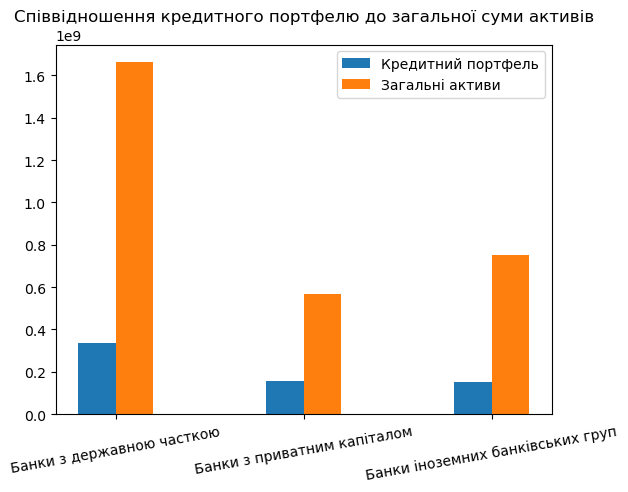

In [37]:
g = table['Група банку']
sum1 = table['Кредитний портфель'] 
sum2 = table['Загальні активи']
width = 0.2
x = np.arange(len(g))
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sum1, width, label ='Кредитний портфель')
rects2 = ax.bar(x + width/2, sum2, width, label ='Загальні активи')
ax.set_xticks(x)
ax.set_xticklabels(g)
plt.xticks(rotation = 10)
ax.legend()
plt.title('Співвідношення кредитного портфелю до загальної суми активів')
plt.show()

Дивлячись на цю діаграму, легко помітити, що найбільші активи і кредитні портфелі на 2023-08-01 мають банки з державною часткою.

# Data preprocessing

Наша цільова змінна --- кредитний портфель, тому маємо задачу регресії.

Основною задачею буде побудувати лінійну модель для кожного банку, якщо відома дата.

Зробимо копію нашого датасету та оберемо ознаки, які нам потрібні при побудові моделі.

In [38]:
dfc = df.copy()[['NKB', 'Дата', 'Кредитний портфель']]
dfc

,NKB,Дата,Кредитний портфель
0,46,2021-02-01,57195899
1,6,2021-02-01,69417687
2,2,2021-02-01,47482714
3,274,2021-02-01,47057767
5,36,2021-02-01,45001854
...,...,...,...
2166,311,2023-08-01,18087
2167,634,2023-08-01,120443
2168,313,2023-08-01,0
2169,129,2023-08-01,2247


Подивимось, чи потрібне нам логарифмування цільової змінної, адже розподіл, як було видно раніше, сильно зміщений вліво і логарифмування може зробити його більш нормальним.

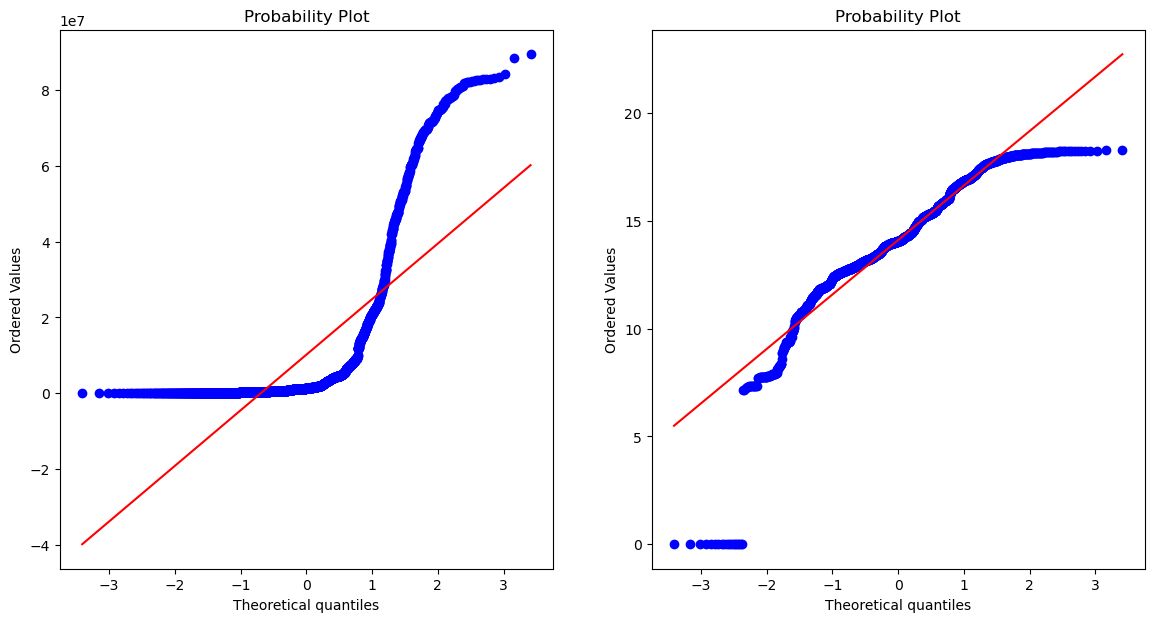

In [39]:
from scipy import stats 
fig = plt.figure(figsize = (14,7))

# Розподіл на неопрацьованих даних
fig.add_subplot(1,2,1)
res = stats.probplot(df['Кредитний портфель'], plot = plt)

# Розподіл при умові, що ми прологарифмували цільову змінну
fig.add_subplot(1,2,2)
res = stats.probplot(np.log1p(df['Кредитний портфель']), plot = plt)

Як бачимо, логарифмування цільової змінної дійсно потрібне.

In [40]:
dfc['Кредитний портфель'] = np.log1p(dfc['Кредитний портфель'])

Подивимось, як це вплинуло на розподіл кредитного портфелю.

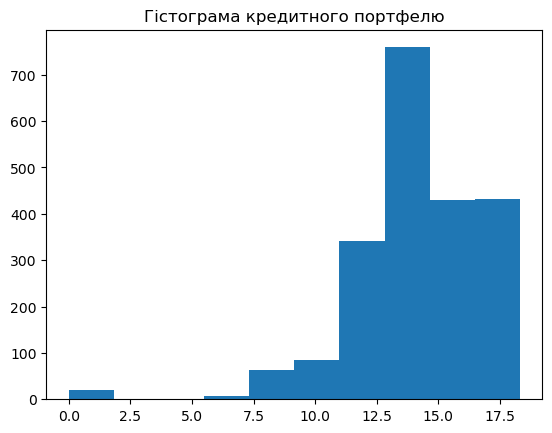

In [41]:
plt.hist(dfc['Кредитний портфель'])
plt.title('Гістограма кредитного портфелю')
plt.show()

Залишилось лише опрацювати стовпчик з датами.

In [42]:
dfc['Дата'] = pd.to_datetime(dfc['Дата'])
dfc['Рік'] = dfc['Дата'].dt.year
dfc['Місяць'] = dfc['Дата'].dt.month
dfc = dfc.drop(['Дата'], axis= 1)

In [43]:
dfc.head(10)

,NKB,Кредитний портфель,Рік,Місяць
0,46,18,2021,2
1,6,18,2021,2
2,2,18,2021,2
3,274,18,2021,2
5,36,18,2021,2
6,272,18,2021,2
7,136,17,2021,2
8,299,16,2021,2
9,296,17,2021,2
10,171,17,2021,2


In [44]:
dfc.dtypes

NKB                     int32
Кредитний портфель    float64
Рік                     int64
Місяць                  int64
dtype: object

In [45]:
dfc.shape

(2135, 4)

Тепер наші дані готові до побудови моделі.

# Linear Regression Model

Побудуємо модель лінійної регресії за допомогою бібліотеки statsmodels для кожного банку. 

Для цього напишемо функцію, що буде будувати модель та повертати на виході $R^2$, яке нам потім знадобиться при побудові графіків.

In [46]:
!pip install plotnine --user

In [47]:
import statsmodels.api as sm

#функція будує модель та повертає r^2
def create_model(data, x, y):
    X = data[x]
    X = sm.add_constant(X)
    Y = data[y] 
    model = sm.OLS(Y, X).fit()
    r2 = model.rsquared_adj
    return r2

Тепер зробимо групування банків за їх номером NKB та застосуємо нашу функію.

In [48]:
r = dfc.groupby('NKB').apply(create_model, x = ['Рік', 'Місяць'], y = 'Кредитний портфель')

In [49]:
pd.options.display.float_format = '{:.3f}'.format

In [50]:
r

NKB
2     0.647
3     0.906
6     0.803
29    0.162
36    0.033
       ... 
512   0.394
553   0.062
634   0.430
694   0.857
774   0.251
Length: 72, dtype: float64

Отримали значення $R^2$ для кожного банку.

Необхідно побудувати графіки лінійних моделей для топ-20 банків за кредитним портфелем станом на 2023-08-01.

Для цього спочатку формуємо необхідний датафрейм.

In [51]:
#dff містить дані за 2023-08-01
top20 = dff.sort_values(by='Кредитний портфель', ascending=False).head(20)
top20

,Дата,NKB,Банк,Кредитний портфель,Загальні активи,Група банку
2107,2023-08-01,46,"АТ КБ ""ПриватБанк""",84310860.304,777563028.126,Банки з державною часткою
2108,2023-08-01,6,"АТ ""Ощадбанк""",80749487.766,335579158.440,Банки з державною часткою
2109,2023-08-01,2,"АТ ""Укрексімбанк""",74538392.647,281057574.575,Банки з державною часткою
2110,2023-08-01,274,"АБ ""УКРГАЗБАНК""",60216970.828,172854258.752,Банки з державною часткою
2112,2023-08-01,36,"АТ ""Райффайзен Банк""",49822766.212,193923389.124,Банки іноземних банківських груп
2126,2023-08-01,115,"АТ ""ПУМБ""",44952098.033,143716766.471,Банки з приватним капіталом
2111,2023-08-01,272,"АТ ""СЕНС БАНК""",36341935.596,95782388.451,Банки з державною часткою
2127,2023-08-01,242,"АТ ""УНІВЕРСАЛ БАНК""",26302792.005,102995590.066,Банки з приватним капіталом
2114,2023-08-01,296,"АТ ""ОТП БАНК""",23589105.717,103530147.354,Банки іноземних банківських груп
2115,2023-08-01,171,"АТ ""КРЕДІ АГРІКОЛЬ БАНК""",19655187.463,101438065.260,Банки іноземних банківських груп


In [52]:
#топ-20 NKB банків
top_nkb = top20['NKB'].sort_values()
top_nkb

2109      2
2108      6
2112     36
2107     46
2129     62
2117     88
2140     91
2130     96
2128    106
2126    115
2113    136
2115    171
2127    242
2132    270
2111    272
2110    274
2119    295
2114    296
2118    298
2131    305
Name: NKB, dtype: int32

In [53]:
df_drow = df[df['NKB'].isin(top_nkb)]
df_drow = df_drow[['NKB', 'Банк', 'Дата', 'Кредитний портфель']]

df_drow --- результуючий датафрейм, за яким ми будемо будувати графіки.

In [54]:
df_drow.head(15)

,NKB,Банк,Дата,Кредитний портфель
0,46,"АТ КБ ""ПриватБанк""",2021-02-01,57195899.107
1,6,"АТ ""Ощадбанк""",2021-02-01,69417687.172
2,2,"АТ ""Укрексімбанк""",2021-02-01,47482713.795
3,274,"АБ ""УКРГАЗБАНК""",2021-02-01,47057767.218
5,36,"АТ ""Райффайзен Банк Аваль""",2021-02-01,45001854.318
6,272,"АТ ""АЛЬФА-БАНК""",2021-02-01,47609066.700
7,136,"АТ ""УКРСИББАНК""",2021-02-01,21442101.470
9,296,"АТ ""ОТП БАНК""",2021-02-01,27362288.017
10,171,"АТ ""КРЕДІ АГРІКОЛЬ БАНК""",2021-02-01,25958957.402
13,298,"АТ ""ПРОКРЕДИТ БАНК""",2021-02-01,19208877.153


In [55]:
bank = df_drow.groupby('NKB')['Банк'].unique()
bank

NKB
2      [АТ "Укрексімбанк", АТ "Укрексімбанк" **, АТ "...
6                      [АТ "Ощадбанк", АТ "Ощадбанк" **]
36     [АТ "Райффайзен Банк Аваль", АТ "Райффайзен Ба...
46                                  [АТ КБ "ПриватБанк"]
62                                     [АТ "ТАСКОМБАНК"]
88                                      [АТ "КРЕДОБАНК"]
91                                      [АТ АКБ "Львів"]
96                                       [АТ "А - БАНК"]
106                       [Акціонерний банк "Південний"]
115                                          [АТ "ПУМБ"]
136                                    [АТ "УКРСИББАНК"]
171                           [АТ "КРЕДІ АГРІКОЛЬ БАНК"]
242                                [АТ "УНІВЕРСАЛ БАНК"]
270                            [АТ "БАНК КРЕДИТ ДНІПРО"]
272                    [АТ "АЛЬФА-БАНК", АТ "СЕНС БАНК"]
274                                    [АБ "УКРГАЗБАНК"]
295                              [АТ "ІНГ Банк Україна"]
296                        

Так як назви однакових банків можуть відрізнятися, то створимо стовпчик, в якому їх назви не відрізняються.

Також додамо відповідні значення $R^2$.

In [56]:
bank_names = []
r2_values = []
for nkb in df_drow['NKB']:
    bank_name = bank[nkb][0]
    r2 = r[nkb]
    bank_names.append(bank_name)
    r2_values.append(r2)
df_drow['Назва банку'] = bank_names
df_drow['R2'] = r2_values
df_drow = df_drow.drop(['Банк'], axis= 1)
df_drow.head(15)

,NKB,Дата,Кредитний портфель,Назва банку,R2
0,46,2021-02-01,57195899.107,"АТ КБ ""ПриватБанк""",0.583
1,6,2021-02-01,69417687.172,"АТ ""Ощадбанк""",0.803
2,2,2021-02-01,47482713.795,"АТ ""Укрексімбанк""",0.647
3,274,2021-02-01,47057767.218,"АБ ""УКРГАЗБАНК""",0.602
5,36,2021-02-01,45001854.318,"АТ ""Райффайзен Банк Аваль""",0.033
6,272,2021-02-01,47609066.700,"АТ ""АЛЬФА-БАНК""",0.249
7,136,2021-02-01,21442101.470,"АТ ""УКРСИББАНК""",0.448
9,296,2021-02-01,27362288.017,"АТ ""ОТП БАНК""",0.091
10,171,2021-02-01,25958957.402,"АТ ""КРЕДІ АГРІКОЛЬ БАНК""",0.098
13,298,2021-02-01,19208877.153,"АТ ""ПРОКРЕДИТ БАНК""",0.132


Тепер можемо об'єднати назви банків з їх $R^2$ і назвемо цей стовпчик "Назва графіку" (вони будуть відображатися в назвах графіків).

In [57]:
df_drow['Назва графіку'] = df_drow['Назва банку'] + ', R2 = ' + df_drow['R2'].round(3).astype(str)
df_drow.head(15)

,NKB,Дата,Кредитний портфель,Назва банку,R2,Назва графіку
0,46,2021-02-01,57195899.107,"АТ КБ ""ПриватБанк""",0.583,"АТ КБ ""ПриватБанк"", R2 = 0.583"
1,6,2021-02-01,69417687.172,"АТ ""Ощадбанк""",0.803,"АТ ""Ощадбанк"", R2 = 0.803"
2,2,2021-02-01,47482713.795,"АТ ""Укрексімбанк""",0.647,"АТ ""Укрексімбанк"", R2 = 0.647"
3,274,2021-02-01,47057767.218,"АБ ""УКРГАЗБАНК""",0.602,"АБ ""УКРГАЗБАНК"", R2 = 0.602"
5,36,2021-02-01,45001854.318,"АТ ""Райффайзен Банк Аваль""",0.033,"АТ ""Райффайзен Банк Аваль"", R2 = 0.033"
6,272,2021-02-01,47609066.700,"АТ ""АЛЬФА-БАНК""",0.249,"АТ ""АЛЬФА-БАНК"", R2 = 0.249"
7,136,2021-02-01,21442101.470,"АТ ""УКРСИББАНК""",0.448,"АТ ""УКРСИББАНК"", R2 = 0.448"
9,296,2021-02-01,27362288.017,"АТ ""ОТП БАНК""",0.091,"АТ ""ОТП БАНК"", R2 = 0.091"
10,171,2021-02-01,25958957.402,"АТ ""КРЕДІ АГРІКОЛЬ БАНК""",0.098,"АТ ""КРЕДІ АГРІКОЛЬ БАНК"", R2 = 0.098"
13,298,2021-02-01,19208877.153,"АТ ""ПРОКРЕДИТ БАНК""",0.132,"АТ ""ПРОКРЕДИТ БАНК"", R2 = 0.132"


In [58]:
names = df_drow.groupby('NKB')['Назва графіку'].unique()
names

NKB
2                 [АТ "Укрексімбанк", R2 = 0.647]
6                     [АТ "Ощадбанк", R2 = 0.803]
36       [АТ "Райффайзен Банк Аваль", R2 = 0.033]
46               [АТ КБ "ПриватБанк", R2 = 0.583]
62                  [АТ "ТАСКОМБАНК", R2 = 0.037]
88                   [АТ "КРЕДОБАНК", R2 = 0.445]
91                   [АТ АКБ "Львів", R2 = 0.783]
96                    [АТ "А - БАНК", R2 = 0.357]
106    [Акціонерний банк "Південний", R2 = 0.299]
115                       [АТ "ПУМБ", R2 = 0.036]
136                 [АТ "УКРСИББАНК", R2 = 0.448]
171        [АТ "КРЕДІ АГРІКОЛЬ БАНК", R2 = 0.098]
242            [АТ "УНІВЕРСАЛ БАНК", R2 = -0.008]
270        [АТ "БАНК КРЕДИТ ДНІПРО", R2 = -0.022]
272                 [АТ "АЛЬФА-БАНК", R2 = 0.249]
274                 [АБ "УКРГАЗБАНК", R2 = 0.602]
295           [АТ "ІНГ Банк Україна", R2 = 0.374]
296                   [АТ "ОТП БАНК", R2 = 0.091]
298             [АТ "ПРОКРЕДИТ БАНК", R2 = 0.132]
305               [ПАТ "БАНК ВОСТОК", R2 = 0.0

In [59]:
labels = {}
for nkb in top_nkb:
    labels[nkb] = names[nkb][0]
labels

{2: 'АТ "Укрексімбанк", R2 = 0.647',
 6: 'АТ "Ощадбанк", R2 = 0.803',
 36: 'АТ "Райффайзен Банк Аваль", R2 = 0.033',
 46: 'АТ КБ "ПриватБанк", R2 = 0.583',
 62: 'АТ "ТАСКОМБАНК", R2 = 0.037',
 88: 'АТ "КРЕДОБАНК", R2 = 0.445',
 91: 'АТ АКБ "Львів", R2 = 0.783',
 96: 'АТ "А - БАНК", R2 = 0.357',
 106: 'Акціонерний банк "Південний", R2 = 0.299',
 115: 'АТ "ПУМБ", R2 = 0.036',
 136: 'АТ "УКРСИББАНК", R2 = 0.448',
 171: 'АТ "КРЕДІ АГРІКОЛЬ БАНК", R2 = 0.098',
 242: 'АТ "УНІВЕРСАЛ БАНК", R2 = -0.008',
 270: 'АТ "БАНК КРЕДИТ ДНІПРО", R2 = -0.022',
 272: 'АТ "АЛЬФА-БАНК", R2 = 0.249',
 274: 'АБ "УКРГАЗБАНК", R2 = 0.602',
 295: 'АТ "ІНГ Банк Україна", R2 = 0.374',
 296: 'АТ "ОТП БАНК", R2 = 0.091',
 298: 'АТ "ПРОКРЕДИТ БАНК", R2 = 0.132',
 305: 'ПАТ "БАНК ВОСТОК", R2 = 0.009'}

In [60]:
df_drow['NKB'] = df_drow['NKB'].map(labels)

Відобразимо лінійні моделі кожного банку за допомогою бібліотеки plotnine

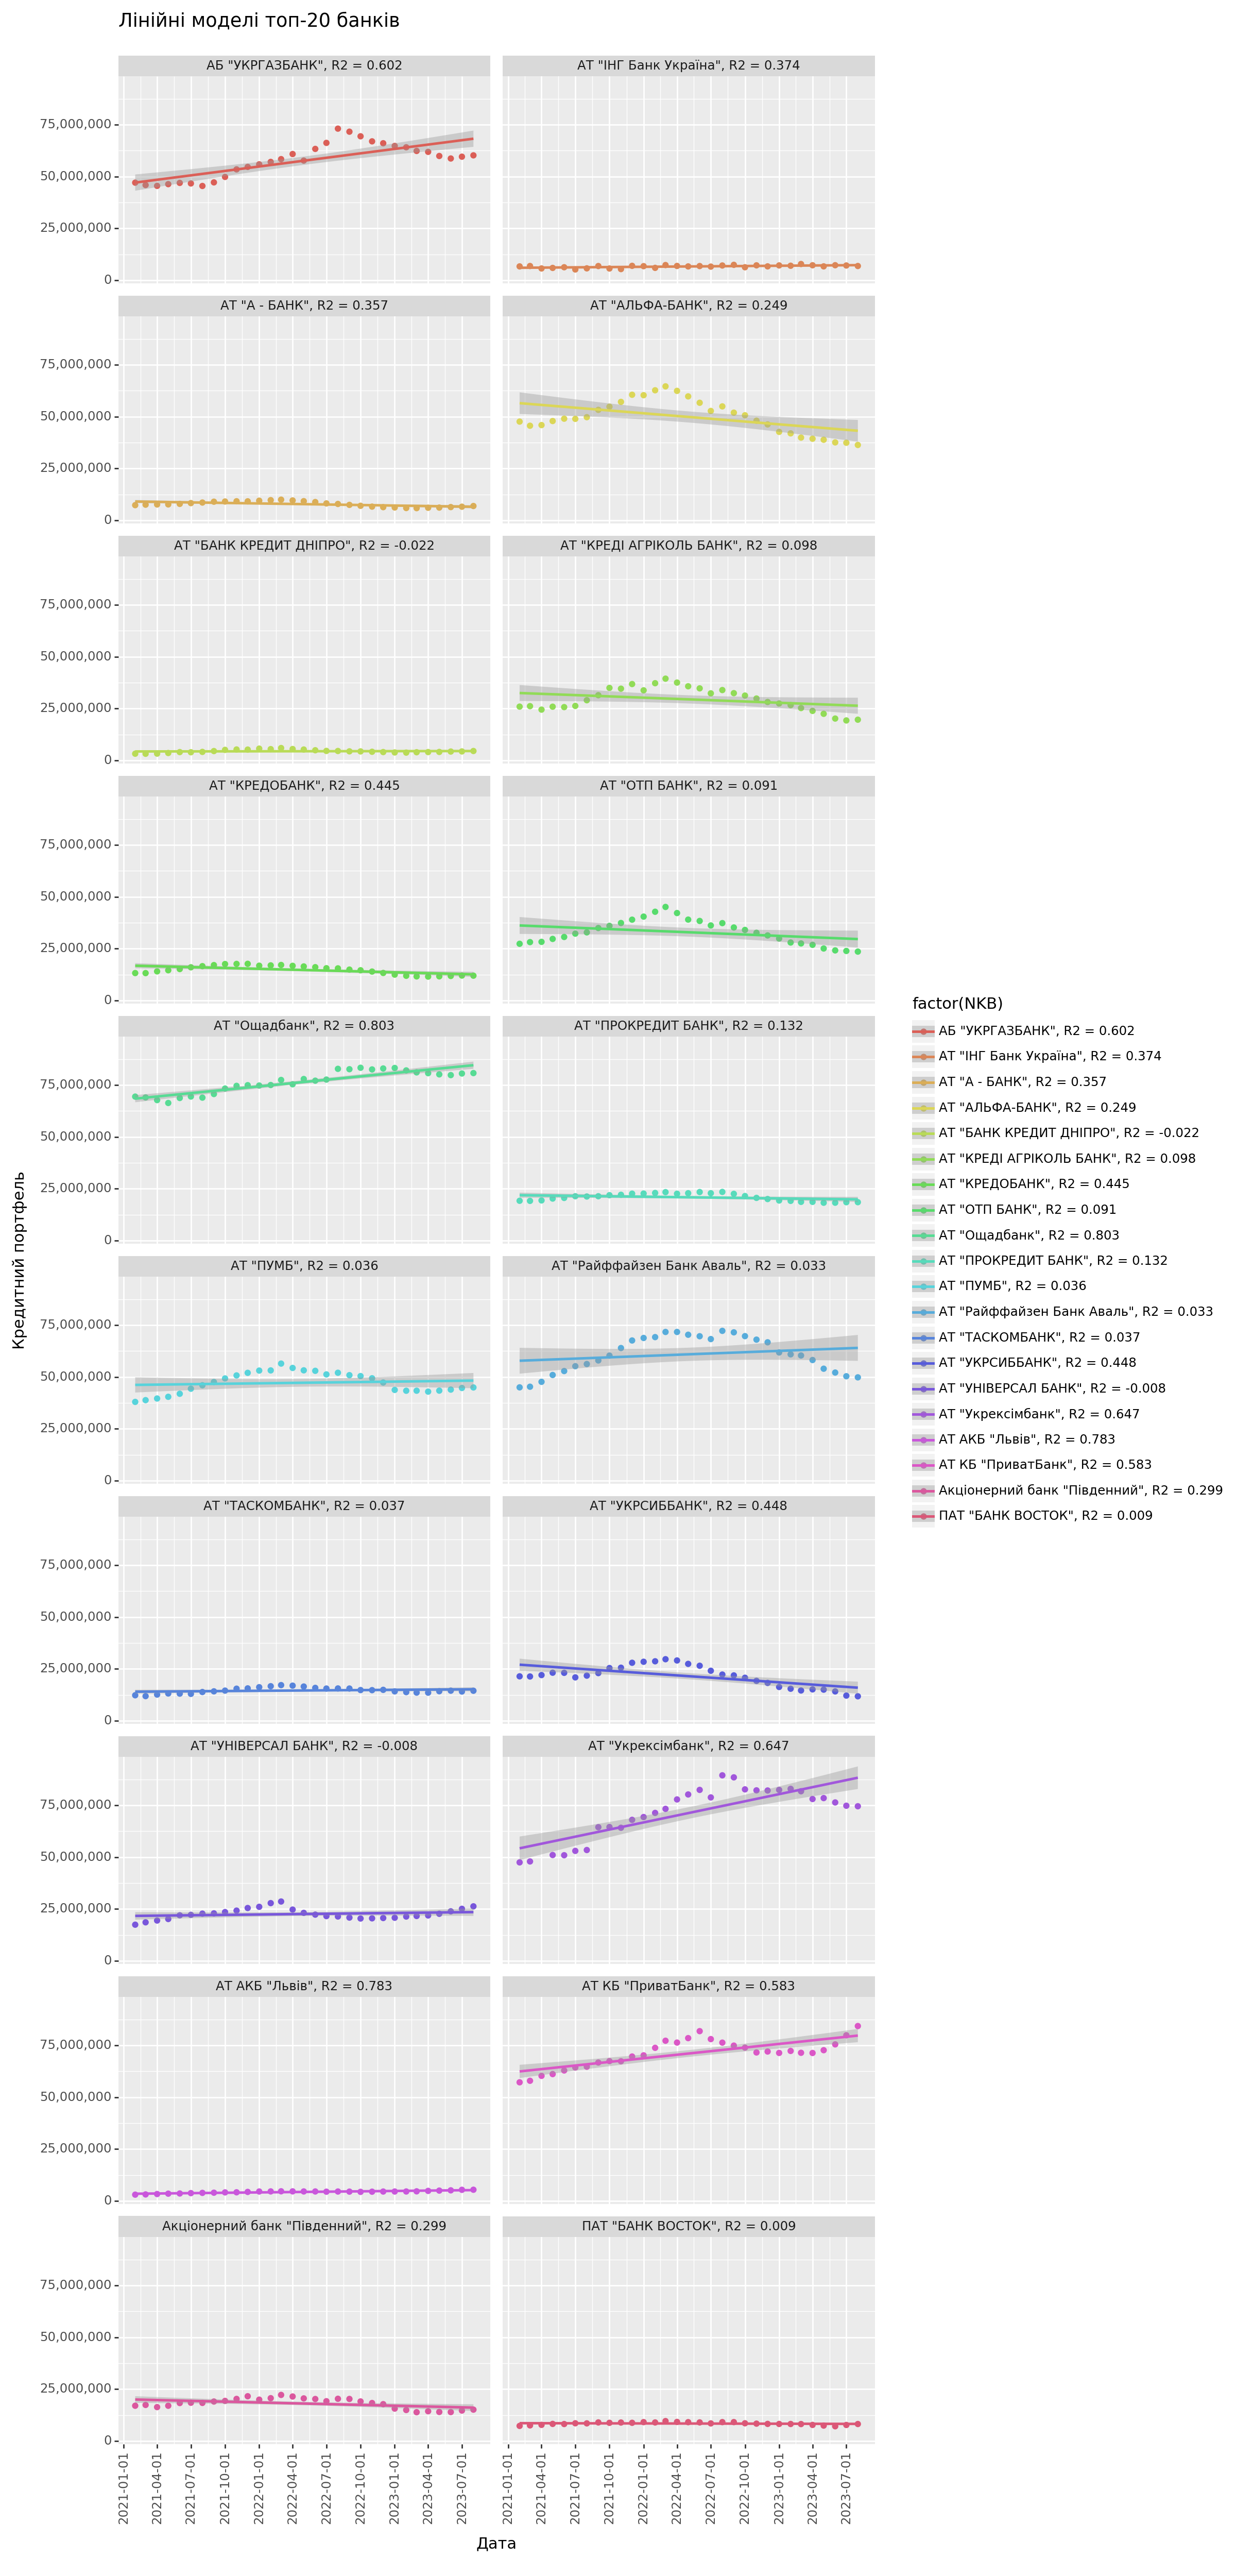

<Figure Size: (1200 x 2500)>

In [61]:
from plotnine import *
from mizani.formatters import comma_format

p = (
    ggplot(df_drow, aes('Дата', 'Кредитний портфель', color='factor(NKB)'))
    + geom_point()
    + stat_smooth(method='lm')
    + facet_wrap('~NKB', ncol=2)
    + labs(
        x ='Дата',
        y ='Кредитний портфель'
    )
    + ggtitle('Лінійні моделі топ-20 банків')
    + theme(figure_size=(12, 25))
    + scale_y_continuous(labels = comma_format())
    + theme(axis_text_x=element_text(rotation=90))
)
p

За графіками можна побачити, що можливо лінійна модель підійде для прогнозування кредитного портфелю таким банкам:

- АТ "Ощадбанк", $R^2$ = 0.803;
- АТ АКБ "Львів", $R^2$ = 0.783;
- АТ "Укрексімбанк", $R^2$ = 0.647;
- АБ "УКРГАЗБАНК", $R^2$ = 0.602;
- АТ КБ "ПриватБанк", $R^2$ = 0.583.